Importing the libraries and dataset. Also taking a look at the dataset.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

slidings = pd.read_csv('Data\slidings_training.csv')
slidings = slidings.drop(columns='Unnamed: 0',axis=1)
slidings.head()

,situation,location,risk,victims,deadly_victims,length,num_points,in_place,sliding,Rain
0,1,1,0,0,0,0,0,0,1,0.60
1,1,1,0,0,0,0,0,0,1,0.60
2,1,1,0,0,0,0,0,0,1,0.13
3,1,1,0,0,0,0,0,0,1,2.17
4,1,1,0,0,0,0,0,0,1,93.60


In [6]:
slidings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45931 entries, 0 to 45930
Data columns (total 10 columns):
situation         45931 non-null int64
location          45931 non-null int64
risk              45931 non-null int64
victims           45931 non-null int64
deadly_victims    45931 non-null int64
length            45931 non-null int64
num_points        45931 non-null int64
in_place          45931 non-null int64
sliding           45931 non-null int64
Rain              45931 non-null float64
dtypes: float64(1), int64(9)
memory usage: 3.5 MB


In this notebook we will be evaluating the Gaussian Naive Bayes algorithm. Random state will be set to 2.

In [13]:
random_state = 2
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


X = slidings.drop(columns={'sliding'},axis=1)
y= slidings['sliding']

model = GaussianNB()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)

model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Evaluating the model.

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      6068
           1       1.00      0.61      0.76      3119

    accuracy                           0.87      9187
   macro avg       0.92      0.81      0.83      9187
weighted avg       0.89      0.87      0.86      9187



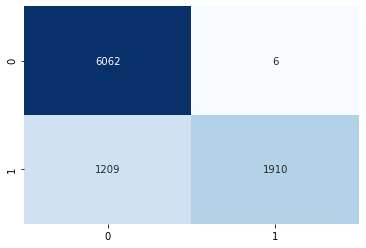

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
cfm = confusion_matrix(y_test,predictions)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')

In [15]:
model.score(X,y)

0.8737671724978773

Validating with cross validation.

In [16]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(model, X, y, cv=10)
scores

array([0.85894645, 0.94883518, 0.82603963, 0.89244503, 0.80992815,
       0.99368604, 0.85586762, 0.74461137, 0.95210102, 0.85521446])

In [17]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.87 (+/- 0.14)


In [18]:
scores_precision = cross_val_score(model, X, y, cv=10, scoring='precision')
scores_precision

array([0.98984199, 0.997669  , 0.99860918, 0.99805068, 0.9953775 ,
       0.99932841, 0.99651163, 0.99421965, 1.        , 0.99649533])

In [19]:
print("Precision: %0.2f (+/- %0.2f)" % (scores_precision.mean(), scores_precision.std() * 2))

Precision: 1.00 (+/- 0.01)


Taking a look at the Roc Curve and the area under the curve.

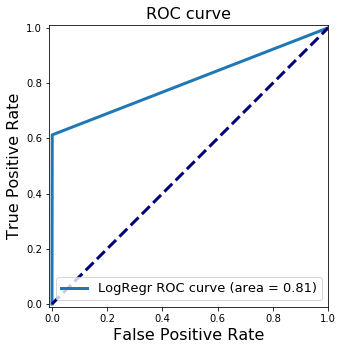

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(5,10))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.gca().set_aspect('equal')
plt.show()

This is a very similar result to the random forest classifier model, which might mean the same issue(the unexpected wight of the situation feature) is verified, so we will also compare this model to a version without the situation feature.